In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Description de la base The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics: 

BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan 

LOAN:Amount of the loan request 

MORTDUE: Amount due on existing mortgage 

VALUE: Value of current property 

REASON: DebtCon = debt consolidation; HomeImp = home improvement JOB: Occupational categories 

YOJ: Years at present job 

DEROG: Number of major derogatory reports 

DELINQ: Number of delinquent credit lines 

CLAGE: Age of oldest credit line in months 

NINQ: Number of recent credit inquiries CLNO: Number of credit lines 

DEBTINC: Debt-to-income ratio

In [3]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
print(hmeq.describe())

               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85.810092     1.728675    10.13

In [20]:
MissingData = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
12,DEBTINC,1267,21.258389
7,DEROG,708,11.879195
8,DELINQ,580,9.731544
2,MORTDUE,518,8.691275
6,YOJ,515,8.640940
10,NINQ,510,8.557047
9,CLAGE,308,5.167785
5,JOB,279,4.681208
4,REASON,252,4.228188
11,CLNO,222,3.724832


DEBTINC a 21 % de valeurs manquantes, ce qui peut poser problème lors de la modélisation, car cette variable pourrait être importante pour évaluer la capacité de remboursement.

Plusieurs variables (DEROG, DELINQ, MORTDUE, YOJ, NINQ) présentent entre 8 % et 12 % de valeurs manquantes, surtout celles liées au comportement de crédit, nécessitant un traitement des valeurs manquantes.



Actions suggérées : Imputation des données manquantes pour les variables clés ou exclusion de certaines si nécessaire pour ne pas biaiser les résultats de la modélisation. (suppression de DEBTINC ??)

In [18]:

numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for col in numeric_columns:
    upper_limit = hmeq[col].quantile(0.99)
    hmeq[col] = np.where(hmeq[col] > upper_limit, upper_limit, hmeq[col])
print("Statistiques descriptives après limitation des valeurs extrêmes :")
print(hmeq[numeric_columns].describe())
filtered_hmeq=hmeq

Statistiques descriptives après limitation des valeurs extrêmes :
               LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18465.625153   73347.905264  100922.883441     8.900964     0.231721   
std    10526.350101   42345.688625   51729.979785     7.505444     0.685430   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.000000   
max    60525.431849  232137.113548  289935.734289    30.000000     4.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.428067   178.571931     1.164827    21.237191    33.560533  
std

         Valeurs manquantes  Pourcentage
BAD                       0     0.000000
LOAN                      0     0.000000
MORTDUE                 518     8.691275
VALUE                   112     1.879195
REASON                  252     4.228188
JOB                     279     4.681208
YOJ                     515     8.640940
DEROG                   708    11.879195
DELINQ                  580     9.731544
CLAGE                   308     5.167785
NINQ                    510     8.557047
CLNO                    222     3.724832
DEBTINC                1267    21.258389


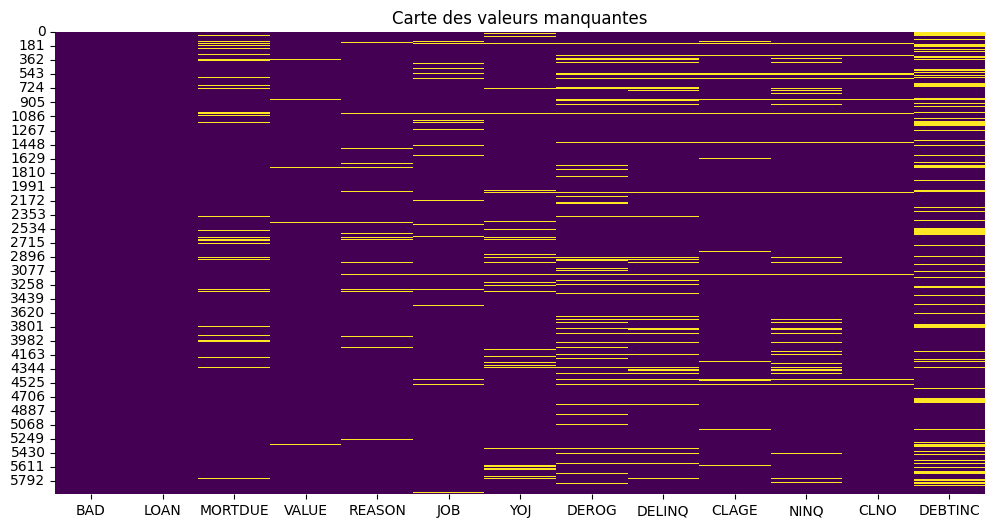

In [19]:
# Identifier les valeurs manquantes
missing_values = filtered_hmeq.isnull().sum()
missing_percentage = (missing_values / len(filtered_hmeq)) * 100
missing_data = pd.DataFrame({'Valeurs manquantes': missing_values, 'Pourcentage': missing_percentage})
print(missing_data)

# Visualiser les valeurs manquantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(filtered_hmeq.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()


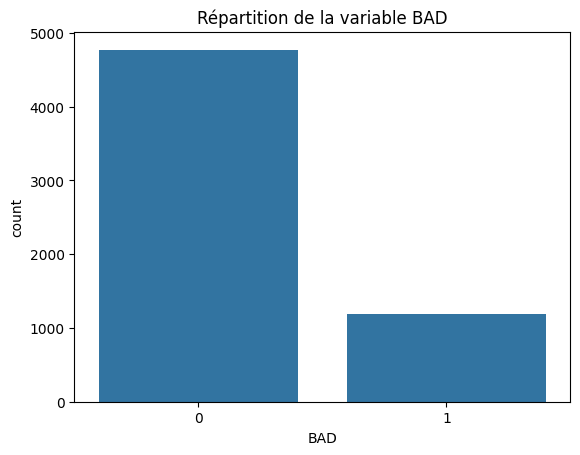

In [6]:
sns.countplot(x='BAD', data=hmeq)
plt.title('Répartition de la variable BAD')
plt.show()

Ce graphique de répartition montre un déséquilibre notable dans la variable BAD. La majorité des observations ont la valeur 0 (pas de défaut), tandis qu'une plus petite proportion a la valeur 1 (défaut). Ce déséquilibre peut avoir un impact sur les performances du modèle, car les modèles de classification sont souvent biaisés vers la classe majoritaire.

Pour gérer ce déséquilibre, vous pourriez envisager les approches suivantes :

Sous-échantillonnage de la classe majoritaire (0) pour équilibrer les classes.

Sur-échantillonnage de la classe minoritaire (1) à l'aide de techniques comme SMOTE (Synthetic Minority Over-sampling Technique).

Utilisation de métriques d'évaluation appropriées, telles que le F1-score, le rappel, ou l'AUC-ROC, pour mieux refléter la performance du modèle sur la classe minoritaire.

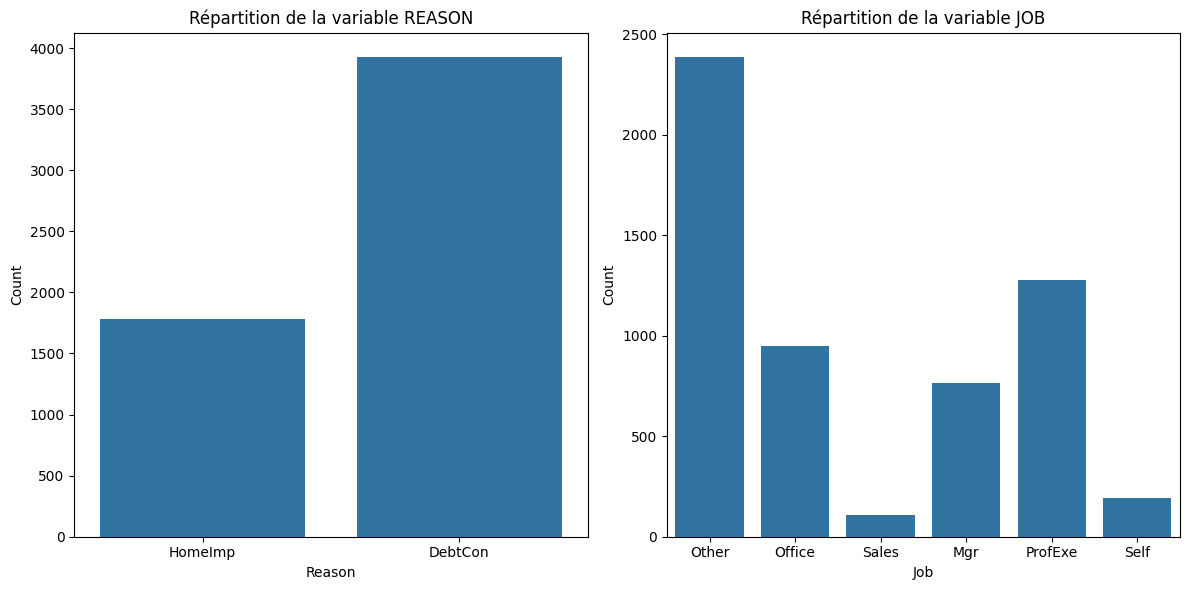

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='REASON', data=hmeq)
plt.title("Répartition de la variable REASON")
plt.xlabel("Reason")
plt.ylabel("Count")

# Graphique pour la variable JOB
plt.subplot(1, 2, 2)
sns.countplot(x='JOB', data=hmeq)
plt.title("Répartition de la variable JOB")
plt.xlabel("Job")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

1. Variable REASON :

DebtCon (Consolidation de dettes) est la catégorie majoritaire, bien plus représentée que HomeImp (Amélioration de la maison).
Cela pourrait suggérer que la plupart des prêts sont demandés pour consolider des dettes, plutôt que pour améliorer la maison.
La différence de répartition entre ces deux catégories pourrait indiquer que les emprunteurs cherchant à consolider leurs dettes sont plus nombreux, ce qui pourrait être lié à un besoin de simplifier ou de gérer des dettes existantes.

2. Variable JOB :

La catégorie Other domine largement les autres, ce qui pourrait représenter une grande diversité de métiers non spécifiquement classés dans les autres catégories.
ProfExe et Office sont également bien représentés, indiquant une proportion notable d'emprunteurs ayant des professions de bureau ou de cadres/professionnels.
Les catégories Sales et Self (travailleurs indépendants) sont beaucoup moins fréquentes. Cela pourrait suggérer une moindre demande de prêts ou un profil différent de ces emprunteurs dans cette base de données.

La surreprésentation de certaines catégories (comme DebtCon pour REASON et Other pour JOB) peut influer sur le modèle de prédiction. Si ces catégories sont surreprésentées dans les cas de défaut de paiement (BAD = 1), cela pourrait augmenter leur impact sur la variable cible.

Une analyse de la corrélation entre ces variables catégorielles et la variable cible BAD serait utile pour déterminer leur importance. Par exemple, on pourrait utiliser un tableau croisé dynamique ou un test statistique pour voir si certaines catégories sont plus susceptibles de faire défaut.

La surreprésentation de certaines catégories (comme DebtCon pour REASON et Other pour JOB) peut influer sur le modèle de prédiction. Si ces catégories sont surreprésentées dans les cas de défaut de paiement (BAD = 1), cela pourrait augmenter leur impact sur la variable cible.

Une analyse de la corrélation entre ces variables catégorielles et la variable cible BAD serait utile pour déterminer leur importance. Par exemple, on pourrait utiliser un tableau croisé dynamique ou un test statistique pour voir si certaines catégories sont plus susceptibles de faire défaut.

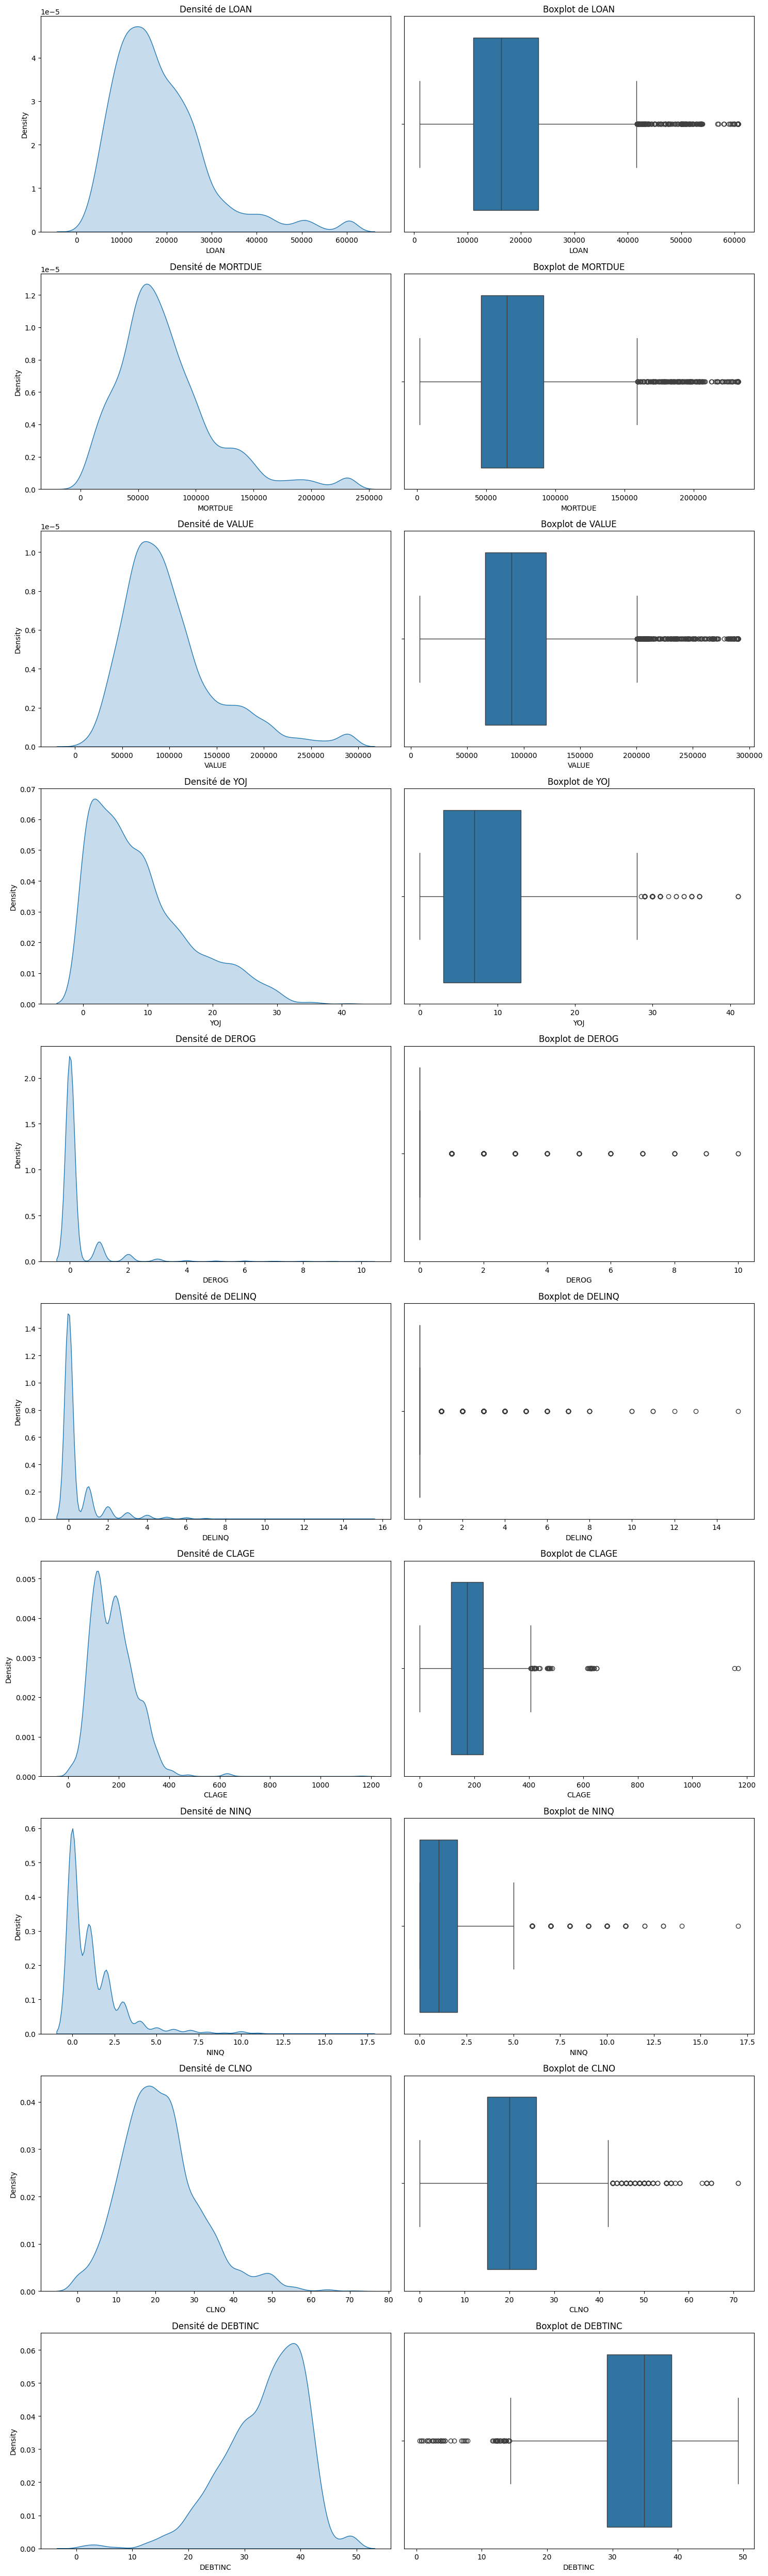

In [14]:
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

plt.figure(figsize=(15, len(numeric_columns) * 5))

for i, col in enumerate(numeric_columns, 1):
    # Courbe de densité
    plt.subplot(len(numeric_columns), 2, 2 * i - 1)
    sns.kdeplot(data=hmeq[col].dropna(), fill=True)
    plt.title(f"Densité de {col}")
    
    # Boxplot
    plt.subplot(len(numeric_columns), 2, 2 * i)
    sns.boxplot(x=hmeq[col].dropna())
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


1. LOAN (Montant du prêt demandé)
Densité : La distribution est asymétrique à droite, avec un pic entre 10 000 et 20 000, puis une traîne qui s’étend vers des valeurs plus élevées.

Boxplot : Il y a de nombreuses valeurs extrêmes au-dessus de la limite supérieure, indiquant que certains prêts sont significativement plus élevés que la majorité.

2. MORTDUE (Montant dû sur l’hypothèque)
Densité : Distribution asymétrique à droite, similaire à LOAN, avec une traîne qui va jusqu'à environ 200 000.

Boxplot : De nombreuses valeurs extrêmes, mais moins concentrées que pour LOAN. Les valeurs extrêmes montrent des emprunteurs ayant des dettes d'hypothèque élevées.

    3  VALUE (Valeur de la propriété)
Densité : Distribution également asymétrique avec une traîne droite. La majorité des propriétés ont une valeur inférieure à 100 000, mais certaines atteignent plus de 250 000.

Boxplot : Les valeurs extrêmes montrent des propriétés de valeur élevée, ce qui peut correspondre à des emprunteurs ayant plus de capital.

4. YOJ (Années au poste actuel)
Densité : Distribution qui tend vers zéro avec un pic autour de 5 ans, puis une baisse progressive. Cela indique que la majorité des emprunteurs ont moins de 15 ans d’ancienneté.

Boxplot : Quelques valeurs extrêmes au-dessus de 20 ans, mais dans l'ensemble, il n’y a pas de traîne aussi longue que dans les autres variables financières.

5. DEROG (Nombre de rapports dérogatoires majeurs)
Densité : Distribution extrêmement asymétrique, avec une concentration élevée autour de zéro.

Boxplot : Une grande majorité des valeurs sont à zéro, avec des valeurs aberrantes allant jusqu'à 10. Cela suggère que la plupart des emprunteurs n'ont pas de rapports dérogatoires majeurs, mais certains en ont plusieurs.

6. DELINQ (Nombre de lignes de crédit en retard)
Densité : Semblable à DEROG, avec une majorité des emprunteurs ayant zéro ou peu de lignes de crédit en retard.

Boxplot : Forte concentration autour de zéro, avec quelques valeurs extrêmes. La présence de quelques cas de délinquance élevée peut être un indicateur de risque pour ces emprunteurs.

CLAGE (Ancienneté de la ligne de crédit la plus ancienne, en mois)
Densité : Distribution étendue avec deux pics : un autour de 100 et un autre vers 300, suggérant deux groupes d’emprunteurs (anciens et récents).

Boxplot : De nombreuses valeurs extrêmes au-dessus de la limite supérieure, indiquant des lignes de crédit très anciennes pour certains emprunteurs, qui peuvent également représenter des clients plus établis.

8. NINQ (Nombre d'enquêtes récentes de crédit)
Densité : La distribution est fortement concentrée autour de zéro et diminue rapidement, ce qui indique que la plupart des emprunteurs n'ont pas eu beaucoup d'enquêtes récentes.

Boxplot : Quelques valeurs extrêmes. Une enquête de crédit récente peut être un indicateur d’une recherche active de nouveaux crédits, potentiellement associée à un risque accru.

9. CLNO (Nombre de lignes de crédit)
Densité : La distribution est asymétrique à droite avec un pic autour de 20 lignes de crédit, ce qui diminue au-delà de 30.

Boxplot : De nombreuses valeurs extrêmes à droite, indiquant que certains emprunteurs ont un nombre de lignes de crédit exceptionnellement élevé.

10. DEBTINC (Ratio dette/revenu)
Densité : Asymétrique avec un pic autour de 30 et une traîne qui s’étend. Ce ratio montre la capacité des emprunteurs à gérer leurs dettes par rapport à leur revenu.

Boxplot : Quelques valeurs extrêmes au-dessus de 50. Un ratio dette/revenu élevé peut indiquer une plus grande vulnérabilité financière.

Résumé et Suggestions :
Valeurs Extrêmes : La plupart des variables financières (LOAN, MORTDUE, VALUE, etc.) montrent des valeurs extrêmes significatives, ce qui pourrait indiquer des emprunteurs avec des profils financiers particuliers. Vous pourriez envisager un traitement de ces valeurs (par exemple, couper ou ajuster les valeurs au-delà du 99e percentile).

Distributions Concentrées : Certaines variables, comme DEROG, DELINQ, et NINQ, montrent des distributions très concentrées autour de zéro, ce qui suggère qu’une majorité d’emprunteurs n'ont pas de comportements de crédit risqués.

Données Hétérogènes : Les distributions bi-modales ou multi-modales, comme celle de CLAGE, peuvent être explorées davantage pour comprendre les différents segments d’emprunteurs.

Statistiques descriptives après limitation des valeurs extrêmes :
              LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.00000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18465.99358   73348.074618  100922.925798     8.900964     0.231721   
std    10527.82299   42346.323821   51730.134577     7.505444     0.685430   
min     1100.00000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.00000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.00000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.00000   91488.000000  119824.250000    13.000000     0.000000   
max    60562.02890  232153.870421  289939.932620    30.000000     4.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.428067   178.572904     1.167349    21.237191    33.560534  
std       0.

In [34]:
hmeq_encoded.corr()['BAD'].sort_values(ascending=False)

BAD               1.000000
DELINQ            0.354107
DEROG             0.276081
DEBTINC           0.199835
NINQ              0.174980
JOB_Other         0.066489
JOB_Sales         0.050934
JOB_Self          0.046245
REASON_HomeImp    0.037517
CLNO             -0.004157
VALUE            -0.029954
JOB_ProfExe      -0.043561
MORTDUE          -0.048219
YOJ              -0.060238
JOB_Office       -0.073613
LOAN             -0.075099
CLAGE            -0.170499
Name: BAD, dtype: float64

In [31]:
# hmeq_encoded_2 = pd.get_dummies(hmeq, columns=['REASON', 'JOB'])
# # hmeq_encoded_2.head()
# # Ici on a une colonne en plus 
# correlation = hmeq_encoded_2['REASON_HomeImp'].corr(hmeq_encoded_2['REASON_DebtCon'])
# print(f"Corrélation entre colonne1 et colonne2 : {correlation}")
# corr_homeimp = hmeq_encoded_2['REASON_HomeImp'].corr(hmeq_encoded_2['BAD'])
# corr_debtcon = hmeq_encoded_2['REASON_DebtCon'].corr(hmeq_encoded_2['BAD'])

# print(f"Corrélation entre REASON_HomeImp et BAD : {corr_homeimp}")
# print(f"Corrélation entre REASON_DebtCon et BAD : {corr_debtcon}")


Corrélation de la variable cible "BAD" :

DELINQ (0.35) a la corrélation positive la plus forte avec BAD, ce qui indique que plus une personne a des défauts de paiement passés, plus elle a de chances de faire défaut à nouveau.

DEROG (0.28) est également positivement corrélé avec BAD, signifiant qu'un historique de incidents de crédit négatifs augmente la probabilité de défaut.

DEBTINC (0.20) montre aussi une corrélation modérée, soulignant qu'un ratio d'endettement élevé est associé à un risque accru de défaut.

Corrélations entre les variables indépendantes :

MORTDUE et VALUE (0.88) présentent une corrélation très forte, ce qui pourrait engendrer des problèmes de multicolinéarité. Ce lien reflète la relation attendue entre la valeur de la maison et le montant de l'hypothèque.

D'autres corrélations notables incluent CLNO avec MORTDUE (0.32) et VALUE (0.32), indiquant que ces variables sont également liées aux caractéristiques financières des emprunteurs.



Conclusion et recommandations :

1-DELINQ, DEROG, et DEBTINC présentent des corrélations significatives avec BAD. Il faudrait donc les conserver pour la modélisation, car elles fournissent des informations cruciales sur le comportement financier des emprunteurs.

MAIS DEBTINC a +20% de valeures manquantes. Il vaut mieu suppr ou imputer ???

2-Forte corrélation entre MORTDUE et VALUE (0.88), il vaut mieu conserver uniquement une de ces variables ou de créer une nouvelle variable (comme un ratio prêt/valeur) afin de réduire la multicolinéarité!(Comme tu disais Lina de créer une nouvelle varaible)
De meme pour les autres varaibles qui sont corrélé modérément???

3-Les variables liées à l'emploi et à la raison du prêt, sont faiblement corrélé avec BAD, pourraient être exclues du modèle (ou utilisées pour des analyses secondaires)

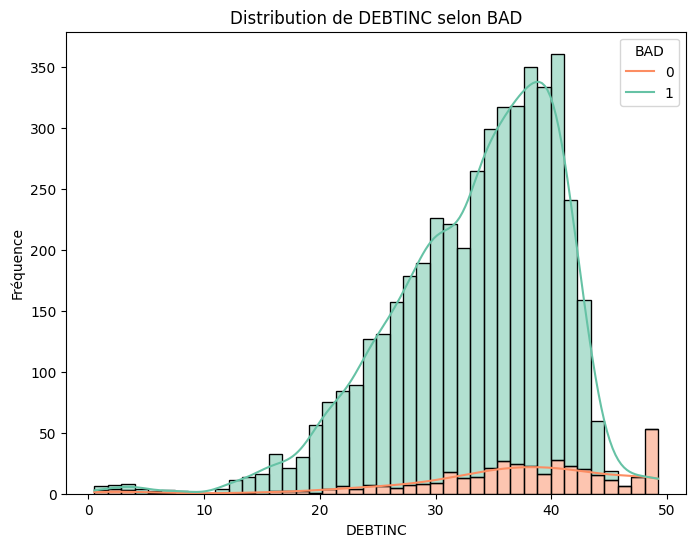

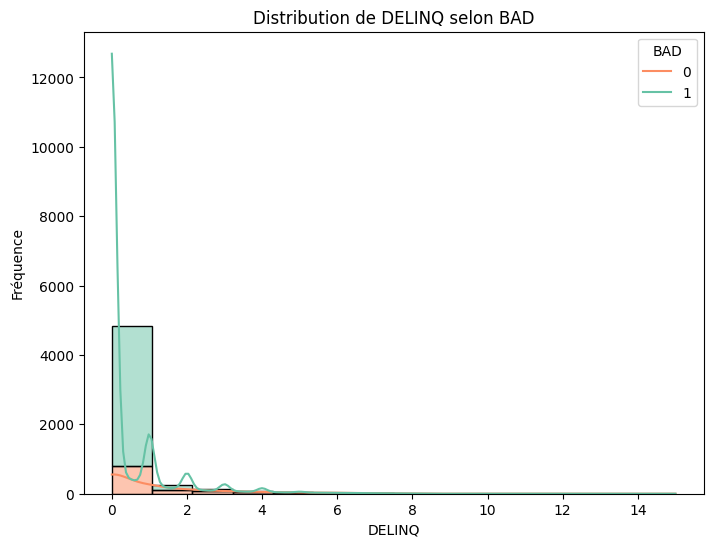

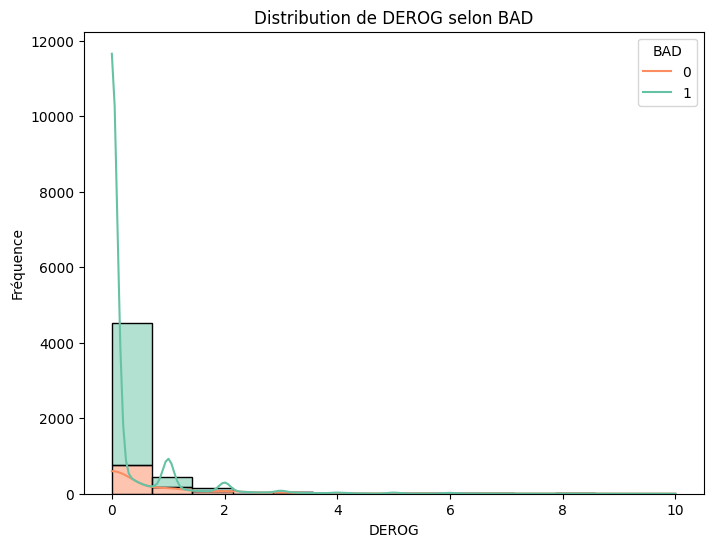

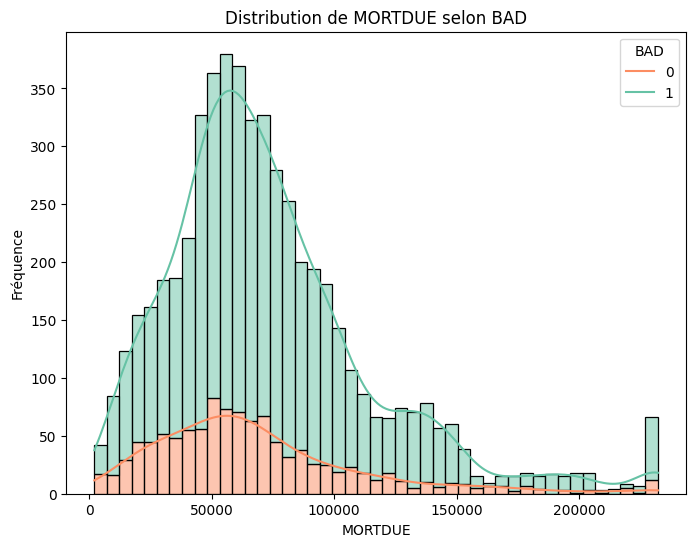

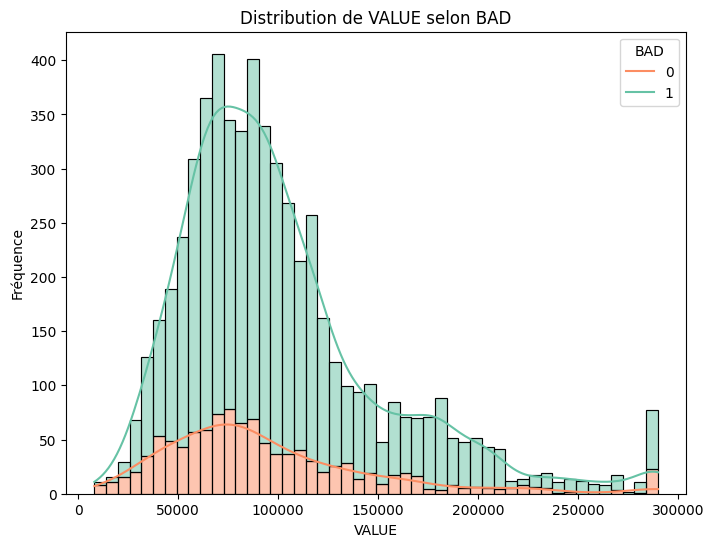

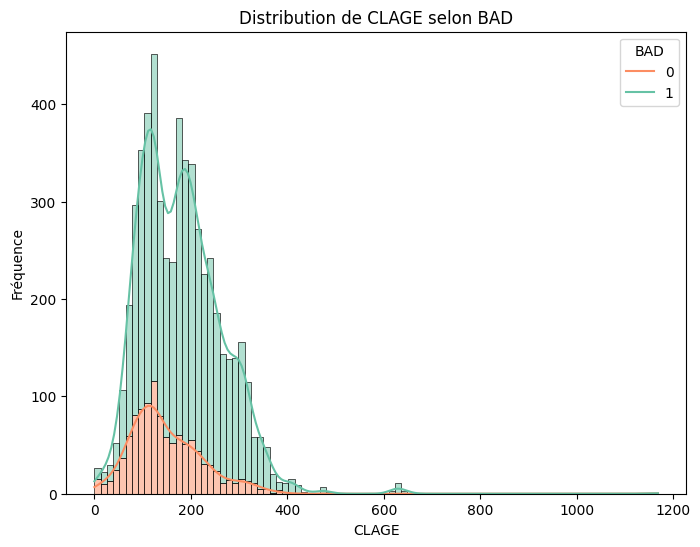

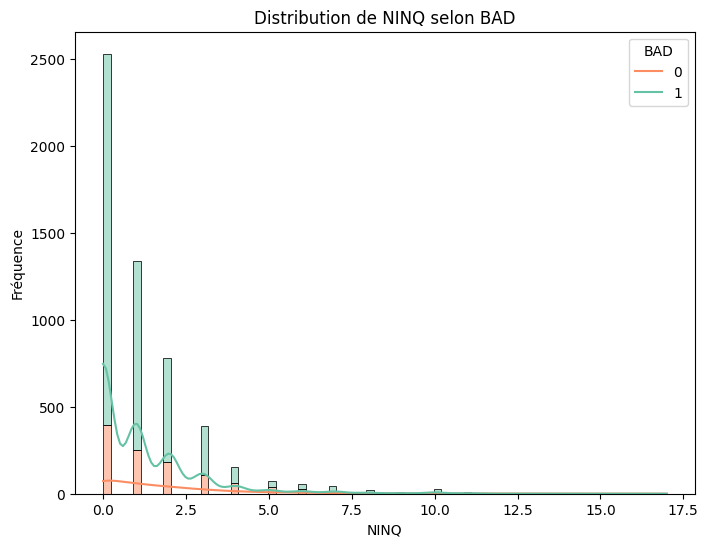

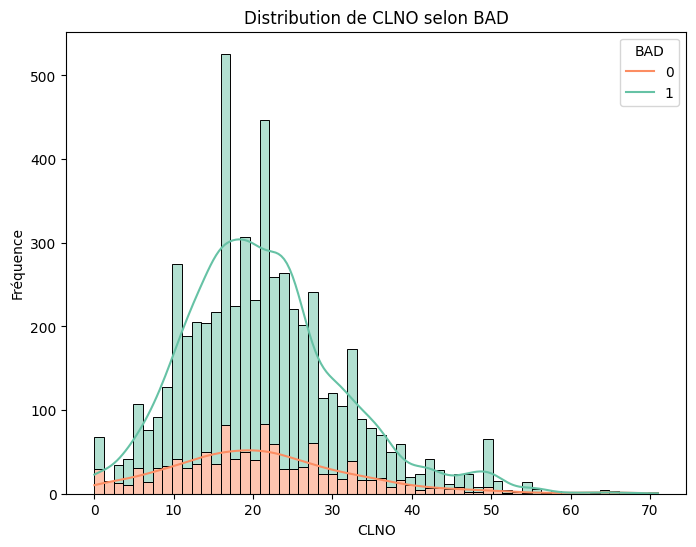

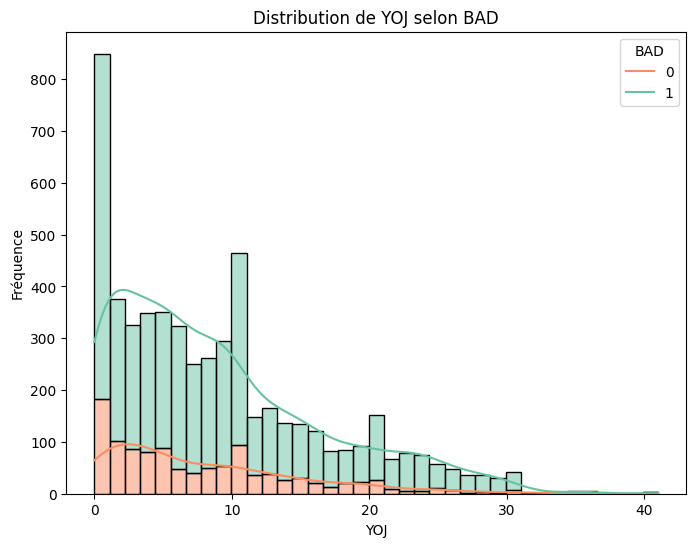

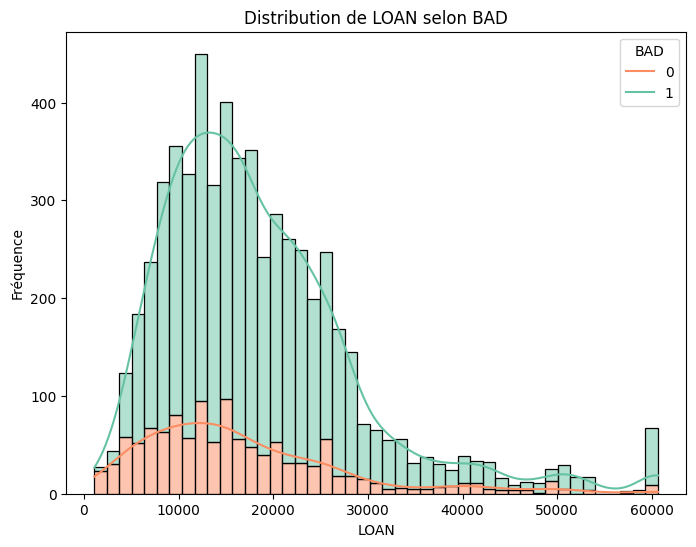

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variables_a_analyser = ['DEBTINC', 'DELINQ', 'DEROG', 'MORTDUE', 'VALUE', 'CLAGE', 'NINQ', 'CLNO', 'YOJ', 'LOAN']

for var in variables_a_analyser:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=hmeq, x=var, kde=True, hue='BAD', multiple="stack", palette="Set2")
    plt.title(f'Distribution de {var} selon BAD')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.legend(title="BAD", labels=['0', '1'])
    plt.show()

DELINQ, DEROG, CLAGE, NINQ, et YOJ sont les variables les plus discriminantes pour prédire le risque de défaut, car elles montrent une différence nette entre les emprunteurs défaillants et non-défaillants.

MORTDUE et VALUE montrent des différences modérées entre les deux groupes, indiquant que la situation hypothécaire et la valeur du bien immobilier sont également liées au risque de défaut.

DEBTINC et LOAN sont moins discriminants visuellement, mais la corrélation de DEBTINC avec BAD (0.20) suggère qu'il peut avoir une importance modérée dans la modélisation du risque de défaut.

In [11]:
for var in variables_a_analyser:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='BAD', y=var, data=hmeq, hue='BAD', palette="Set2", dodge=False)
    plt.title(f'Boxplot de {var} selon BAD')
    plt.xlabel('BAD')
    plt.ylabel(var)
    plt.legend(title='BAD', loc='upper right')
    plt.show()



NameError: name 'variables_a_analyser' is not defined

Variables fortement discriminantes : DELINQ, DEROG, CLAGE sont les plus discriminantes et devraient être privilégiées dans les analyses prédictives.

Variables modérément discriminantes : DEBTINC, MORTDUE, NINQ, CLNO peuvent apporter des informations supplémentaires, mais leur impact est moins prononcé.

Variables faiblement discriminantes : VALUE, YOJ, LOAN semblent avoir un impact plus faible et pourraient être moins prioritaires dans la modélisation.